In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()


Saving temperature_dataset.csv to temperature_dataset.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "temperature_dataset.csv" with length 12202 bytes


In [4]:
temperature_dataset = pd.read_csv('temperature_dataset.csv')

In [5]:
X = temperature_dataset.iloc[:, [1,2]]

In [6]:
Y = temperature_dataset.iloc[:, 2]

In [8]:
temperature_dataset['LandAverageTemperatureUncertainty'].replace(['1', '5'], [0, 1], inplace=True)

In [10]:
data_numeric = temperature_dataset.select_dtypes(include=['number'])


<Axes: >

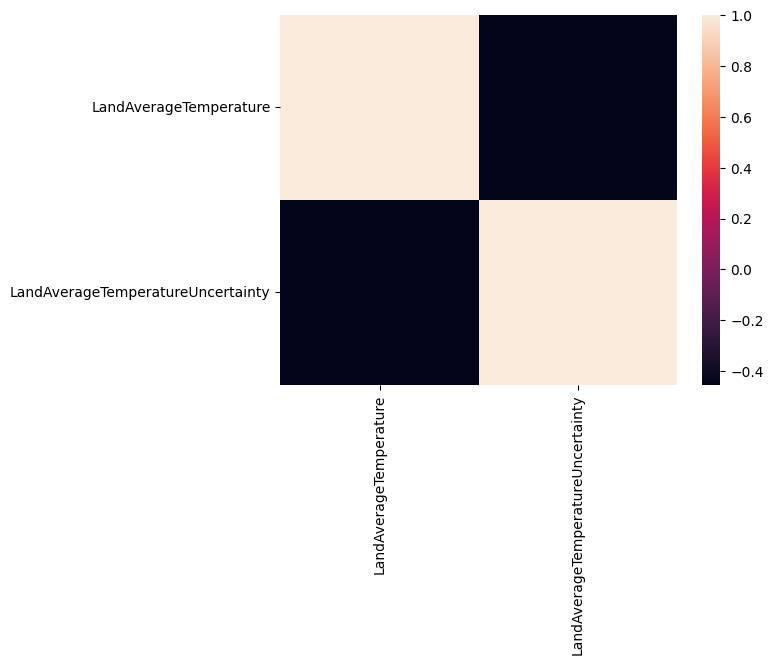

In [11]:
sns.heatmap(data_numeric.corr())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state =0)


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit the scaler to your training data and transform it
X_train= sc_X.fit_transform(X_train)

# Transform your test data using the same scaler
X_test=sc_X.transform(X_test)

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [17]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(random_state=0)
LogR.fit(X_train, Y_train_encoded)

LogisticRegression(random_state=0)

In [18]:
y_pred= LogR.predict( X_test)
y_pred


array([167, 280, 281, 124, 124, 280, 281,  99, 280,  99, 167,  15, 124,
       186, 316, 124,  47,  15,  15, 281, 124,  47,  47, 281,  99,  47,
        99, 253, 281, 124,  15, 253, 280,  15, 186,  47,  99,  15, 124,
        15,  15,  99,  99, 186, 318, 197,  99, 124,  15,  47, 316, 124,
        15, 107, 186, 167, 280, 281,  15, 124, 197,  65, 124, 186, 124,
       124,  99, 124,  15, 280,  15, 280, 280, 124,  47, 186, 167, 280,
        99,  99, 281,  47,  15, 280, 253, 186, 186, 280,  47, 281, 186,
       253,  47,  15,  99, 167, 309,  15, 197, 280, 253,  47, 107,  47,
       253, 124, 280,  99, 107,  15, 253, 253, 124,  99,  47,  65, 186,
        99, 253,  15,  15, 186, 280, 124, 186,  15, 253, 253,  65, 186,
       124, 186,  15, 311, 124,  15, 186, 124,  15, 124, 124, 280, 186,
       280,  15, 317, 253,  15, 124, 186, 253,  15, 280, 280, 186,  15,
        99, 253,  99, 280, 124,  15, 280,  15, 280,  99, 124])

<ipython-input-19-c28773773920>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


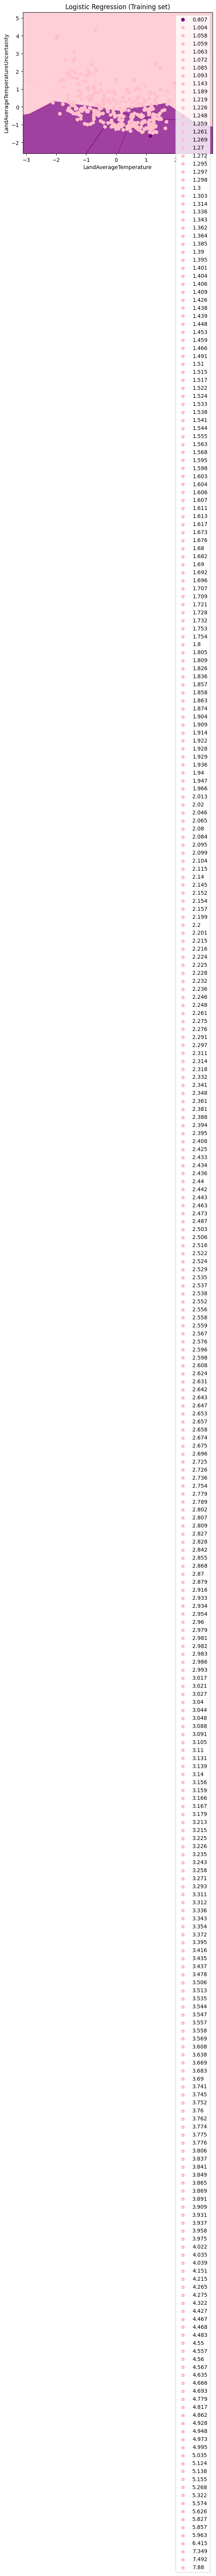

In [19]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step =0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step =0.01))
plt.contourf(X1, X2, LogR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('purple', 'pink'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LandAverageTemperature')
plt.ylabel('LandAverageTemperatureUncertainty')
plt.legend()
plt.show()